In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [25]:
df = pd.read_csv('/content/drive/MyDrive/PR Dibimbing/Starbucks satisfactory survey.csv')

In [26]:
df.describe

<bound method NDFrame.describe of                         Timestamp  ... 20. Will you continue buying at Starbucks?
0    2019/10/01 12:38:43 PM GMT+8  ...                                        Yes
1    2019/10/01 12:38:54 PM GMT+8  ...                                        Yes
2    2019/10/01 12:38:56 PM GMT+8  ...                                        Yes
3    2019/10/01 12:39:08 PM GMT+8  ...                                         No
4    2019/10/01 12:39:20 PM GMT+8  ...                                        Yes
..                            ...  ...                                        ...
117  2019/10/04 12:24:26 AM GMT+8  ...                                        Yes
118   2019/10/04 9:30:09 AM GMT+8  ...                                        Yes
119   2019/10/04 1:46:07 PM GMT+8  ...                                         No
120  2019/10/05 11:01:14 AM GMT+8  ...                                        Yes
121   2019/10/05 4:57:22 PM GMT+8  ...                          

In [27]:
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [28]:
df.tail()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes
121,2019/10/05 4:57:22 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee,Less than RM20,1,1,5,4,3,3,2,In Store displays,No


In [29]:
df[df.isna().any(axis=1)]

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
81,2019/10/03 9:11:28 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Never,NaN,Below 30 minutes,more than 3km,No,Never buy any,Zero,1,1,1,3,3,3,3,NaN,No


In [30]:
df_new = df.rename(columns={"1. Your Gender": 'Gender',
                                "2. Your Age": "ageGroup",
                                "3. Are you currently....?":"status",
                                "4. What is your annual income?":"annualIncome",
                                "5. How often do you visit Starbucks?":"visitFrequency",
                                "6. How do you usually enjoy Starbucks?":"Method",
                                "7. How much time do you normally  spend during your visit?":"timeCost",
                                "8. The nearest Starbucks's outlet to you is...?":"location",
                                "9. Do you have Starbucks membership card?":"membership",
                                "10. What do you most frequently purchase at Starbucks?":"mostPurchase",
                                "11. On average, how much would you spend at Starbucks per visit?":"moneySpend",
                                "12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:":"brandCompare",
                                "13. How would you rate the price range at Starbucks?":"ratingPrice",
                                "14. How important are sales and promotions in your purchase decision?":"decisionpromotion",
                                "15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)":"ambiance",
                                "16. You rate the WiFi quality at Starbucks as..":"qualityWifi",
                                "17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)":"rateService",
                                "18. How likely you will choose Starbucks for doing business meetings or hangout with friends?":"doing",
                                "19. How do you come to hear of promotions at Starbucks? Check all that apply.":"promotion",
                                "20. Will you continue buying at Starbucks?":"continuity"
                                 }, inplace=False)

In [31]:
df_corr = df_new.corr()
df_corr

,brandCompare,ratingPrice,decisionpromotion,ambiance,qualityWifi,rateService,doing
brandCompare,1.000000,0.532617,0.222201,0.575164,0.287830,0.451050,0.418969
ratingPrice,0.532617,1.000000,0.170491,0.392726,0.289394,0.365881,0.420468
decisionpromotion,0.222201,0.170491,1.000000,0.398178,0.327042,0.389976,0.197933
ambiance,0.575164,0.392726,0.398178,1.000000,0.488045,0.604545,0.349267
qualityWifi,0.287830,0.289394,0.327042,0.488045,1.000000,0.581395,0.259387
rateService,0.451050,0.365881,0.389976,0.604545,0.581395,1.000000,0.425870
doing,0.418969,0.420468,0.197933,0.349267,0.259387,0.425870,1.000000


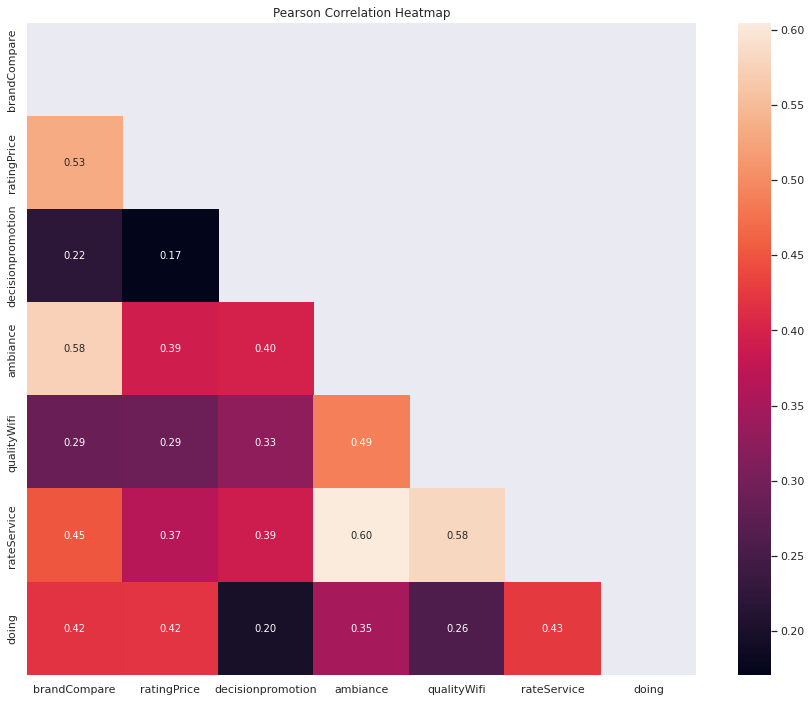

In [32]:
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()